In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Dataset Columns:**  
CALENDAR_ID: Identifier for the date  

SERVICE_ABBR: Service Type. indicates the schedule type operating that day. 1 = Weekday, 2 = Saturday, 3 = Sunday. Normally this corresponds to the day of the week, but sometimes Saturday or Sunday service will run on a weekday (i.e. during a holiday). 
 
ADHERENCE_ID: Unique identifier for each record
  
DATE: Trip dat
e  
ROUTE_ABBR: Route identifier. Routes can be found here https://www.wegotransit.com/ride/maps-schedules/bus/. For example, Route 55 is Murfreesboro Pi
ke  
BLOCK_ABBR: Indicates the section (block) of the route that the given stop is
 on  
OPERATOR: Indicates the operator (dri
ver)  
TRIP_ID: Identifies the trip; Note that a TRIP_ID is reused for the a given route and scheduled time, so it does not uniquely identify a trip, but can be used in combination with the CALENDA
R_ID.  
OVERLOAD_ID: signifies that the record is from a trip that was added by the dispatcher and was not part of the original schedule for the day. Usually, these are created when one vehicle breaks down and another is covering the same service. As far as the actual value, 0 means that this record was part of the original schedule, and anything other than 0 means it was 
added.  
ROUTE_DIRECTION_NAME: Which direction the trip is going; Either to downtown or from d
owntown  
TIME_POINT_ABBR: Identifies the time point of the
 record.  
ROUTE_STOP_SEQUENCE: Identifies the st
op point.  
TRIP_EDGE: defines whether the stop is the first one on the trip (1), an intermediate stop (0), or the last one on 
a trip (2)  
LATITUDE/LONGITUDE: Location 
in lat/long  
SCHEDULED_TIME: Schedul
ed stop time  
ACTUAL_ARRIVAL_TIME: actual
 arrival time  
ACTUAL_DEPARTURE_TIME: actual 
departure time  
ADHERENCE: Difference between actual departure time and scheduled time; negative indicates departure time after scheduled time and positive indicates departure time before scheduled time. Generally, on-time is considered to be no more than 6 minutes lates and no more than one minute early, but there are some exceptions to these cutoffs. Whether or not a bus is on-time can be determined by looking at the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME
_COUNT columns.  
SCHEDULED_HDWY: Scheduled headway in minutes for the given timepoint crossing record; headway is the difference between the scheduled_time and the previous scheduled ti
me for that stop  
ACTUAL_HDW
Y: Actual headway  
HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than schedu
led (i.e. gapping)  
ADJUSTED_EARLY_COUNT: An indicator for if the bus is con
sidered to be early  
ADJUSTED_LATE_COUNT: An indicator for if the bus is c
onsidered to be late  
ADJUSTED_ONTIME_COUNT: An indicator for if the bus is con
sidered to be on time  
STOP_CANCELLED:	flags whether a crossing 
was canceled or waived  
PREV_SCHED_STOP_CANCELLED: flags whether the previous timepoint crossing was cancelled or waived. Useful for excluding records where the headway values are extremely high because the bus is j
ust coming off a detour  
IS_RELIEF: flags whether a particular crossing is a relief - i.e. the first timepoint crossing of a new
 driver on the bus/block  
DWELL_IN_MINS: Actual Departure Time - Actual 
Arrival Time (in minutes)  
SCHEDULED_LAYOVER_MINUTES: Applies only for TRIP_EDGE 1 (the beginning of a trip). Tells how much time between the scheduled time at the end of the previous trip and the current trip. 

# Goals of this project:
1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 
2. How does direction of travel, route, or location affect the headway and on-time performance?
3. How does time of day or day of week affect headway and on-time performance?
4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [6]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

# 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

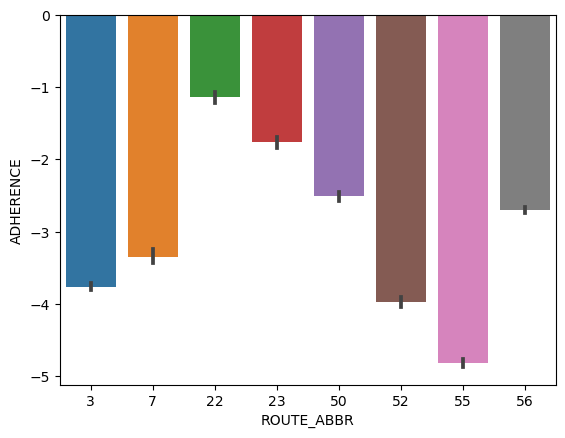

In [8]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADHERENCE'])

<Axes: xlabel='ROUTE_ABBR', ylabel='HDWY_DEV'>

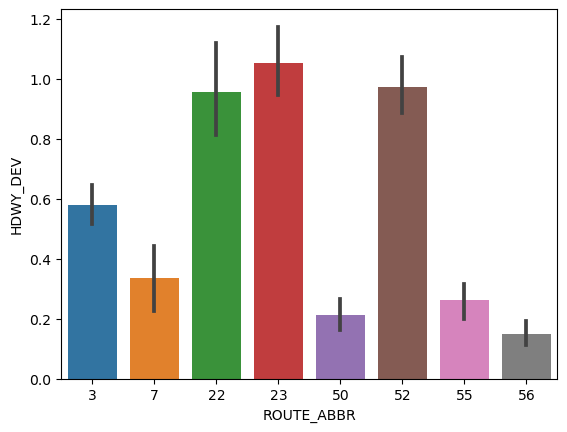

In [9]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['HDWY_DEV']) #positive headway, gapping?

In [10]:
# Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY.

In [11]:
avg_ad = wego.groupby('ROUTE_ABBR')['ADHERENCE'].mean().reset_index() #overall average to adherence
avg_ad

,ROUTE_ABBR,ADHERENCE
0,3,-3.761491
1,7,-3.346555
2,22,-1.138107
3,23,-1.760110
4,50,-2.505022
5,52,-3.971342
6,55,-4.823302
7,56,-2.703988


<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

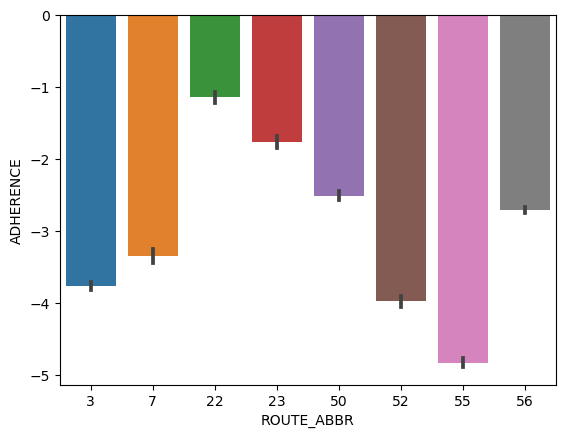

In [12]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADHERENCE'])

In [13]:
wego.groupby('ROUTE_ABBR')['ADHERENCE'].max() #max time over adherence ?

ROUTE_ABBR
3     33.750000
7     88.383333
22    24.733333
23    33.633333
50    22.350000
52    30.200000
55    40.250000
56    39.916666
Name: ADHERENCE, dtype: float64

# 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

Adherence refers to the difference between scheduled time and the actual time that the bus departs from a stop.
A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

# < -6 --> late
# > 1 ---> early

Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway.

In [17]:
wego_early_ad = wego.drop(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'BLOCK_ABBR', 'OVERLOAD_ID','ROUTE_STOP_SEQUENCE'], axis=1) 
wego_early_ad = wego_early_ad[(wego_early_ad['ADHERENCE'] > 1)]
wego_early_ad

,DATE,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,22,1040,345104,TO DOWNTOWN,MCC5_10,2,36.167091,-86.781923,2023-08-01 05:10:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
6,2023-08-01,22,1040,345105,FROM DOWNTOWN,MHSP,2,36.181248,-86.847705,2023-08-01 05:32:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
10,2023-08-01,22,1040,345106,TO DOWNTOWN,MCC5_10,2,36.167091,-86.781923,2023-08-01 06:10:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
12,2023-08-01,22,1040,345107,FROM DOWNTOWN,CV23,0,36.183480,-86.814220,2023-08-01 06:25:00,...,11.116666,-3.883334,1,0,0,0,0.0,0,0.0,NaN
13,2023-08-01,22,1040,345107,FROM DOWNTOWN,MHSP,2,36.181248,-86.847705,2023-08-01 06:35:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,2023-09-30,7,572,353430,TO DOWNTOWN,MCC5_9,2,36.167091,-86.781923,2023-09-30 10:03:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
350273,2023-09-30,7,2103,353431,FROM DOWNTOWN,21BK,0,36.138881,-86.800622,2023-09-30 10:31:00,...,26.550000,-4.450000,1,0,0,0,0.0,0,0.0,NaN
350274,2023-09-30,7,2103,353431,FROM DOWNTOWN,HBHS,2,36.107575,-86.812719,2023-09-30 10:45:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN
350277,2023-09-30,7,2103,353432,TO DOWNTOWN,MCC5_9,2,36.167091,-86.781923,2023-09-30 11:33:00,...,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN


In [18]:
wego_late_ad = wego.drop(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'BLOCK_ABBR', 'OVERLOAD_ID','ROUTE_STOP_SEQUENCE'], axis=1) 
wego_late_ad = wego_late_ad[(wego_late_ad['ADHERENCE'] < -6)]
wego_late_ad

,DATE,ROUTE_ABBR,OPERATOR,TRIP_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
69,2023-08-01,22,2374,345124,FROM DOWNTOWN,YGKG,2,36.203239,-86.840636,2023-08-01 15:44:00,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
78,2023-08-01,22,2689,345127,TO DOWNTOWN,CV23,0,36.182177,-86.814445,2023-08-01 17:14:00,...,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN
83,2023-08-01,22,2689,345128,FROM DOWNTOWN,HPKL,0,36.218706,-86.834137,2023-08-01 18:06:00,...,45.016666,-3.983334,0,1,0,0,0.0,0,0.000000,NaN
91,2023-08-01,22,2689,345131,TO DOWNTOWN,MHSP,1,36.181248,-86.847705,2023-08-01 19:35:00,...,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0
92,2023-08-01,22,2689,345131,TO DOWNTOWN,CV23,0,36.182177,-86.814445,2023-08-01 19:44:00,...,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,2023-09-30,7,2312,353448,TO DOWNTOWN,HBHS,1,36.107575,-86.812719,2023-09-30 22:16:00,...,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,2023-09-30,7,2312,353448,TO DOWNTOWN,21BK,0,36.138372,-86.800622,2023-09-30 22:23:00,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,2023-09-30,7,2312,353448,TO DOWNTOWN,MCC5_9,2,36.167091,-86.781923,2023-09-30 22:38:00,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350327,2023-09-30,7,2312,353449,FROM DOWNTOWN,21BK,0,36.138881,-86.800622,2023-09-30 22:59:00,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [19]:
late_ad = wego_late_ad['ADHERENCE'].sort_values().reset_index()
late_ad

,index,ADHERENCE
0,103162,-948.533333
1,19788,-675.000000
2,340625,-618.166666
3,30377,-542.233333
4,229460,-539.933333
...,...,...
59033,221031,-6.016666
59034,76579,-6.016666
59035,153951,-6.016666
59036,222115,-6.016666


In [25]:
# make a plot of late and early adherence

In [ ]:
# slice dataframes for headway deviation

In [23]:
# make a plot and a table holding all this ^